In [1]:
!pip install geopandas
!pip install folium
!pip install geopy
!pip install reverse_geocoder
!pip install matplotlib
!pip installseaborn
!pip install scikit-learn
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


ERROR: unknown command "installseaborn" - maybe you meant "install"



In [19]:

data =pd.read_csv('D://Training_Projects//HousePricing//Data//kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# ## Scrub Data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [80]:
len(data)

21613

In [23]:
#df['sqft_basement'].value_counts(), you're getting a count of each unique value in the 'sqft_basement' column. This can provide insights into the distribution of different basement sizes in the dataset
data['sqft_basement'].value_counts()



0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [24]:
##Get summary statistics for sqft_basement
data[['sqft_basement']].describe()

,sqft_basement
count,21613.000000
mean,291.509045
std,442.575043
min,0.000000
25%,0.000000
50%,0.000000
75%,560.000000
max,4820.000000


In [25]:
# Get number of missing values in each column
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [26]:
# Check if exist null values
data.isna().any().any()

False

In [28]:
# Cheking for duplicated rows
duplicates=data[data.duplicated]
print(len(duplicates))

0


In [30]:
# Cheking for rows with same id
duplicates=data[data.duplicated(subset=['id'])]
print(len(duplicates))

177


# Train-Test Split

In [31]:
x=data.drop('price',axis=1)
x

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
y=data['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [33]:
# Split the data into training and testing sets (e.g., 90% training, 10% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.1,random_state=42)
print(len(x_train),len(x_test),len(y_train),len(y_test))


19451 2162 19451 2162


In [34]:
data2=pd.concat([x_train,y_train],axis=1)
data2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6181,2787310130,20141212T000000,4,1.75,2090,7416,1.0,0,0,4,...,1050,1040,1970,0,98031,47.4107,-122.179,1710,7527,289950.0
4688,4358700100,20141202T000000,3,2.50,1450,5175,1.0,0,0,3,...,1030,420,1995,0,98133,47.7082,-122.338,1740,9250,465000.0
1703,3121069036,20141208T000000,3,1.75,3020,360241,2.0,0,0,3,...,3020,0,1992,0,98092,47.2662,-122.088,1890,209959,617000.0
21200,1959700225,20150224T000000,3,1.75,1370,1990,3.0,0,0,3,...,1370,0,2014,0,98102,47.6434,-122.324,1730,1990,720000.0
18874,3205500230,20140811T000000,3,1.75,1330,7216,1.0,0,0,3,...,1330,0,1969,0,98034,47.7199,-122.180,1500,8000,381000.0


# Let us investigate renovations.


<function matplotlib.pyplot.show(close=None, block=None)>

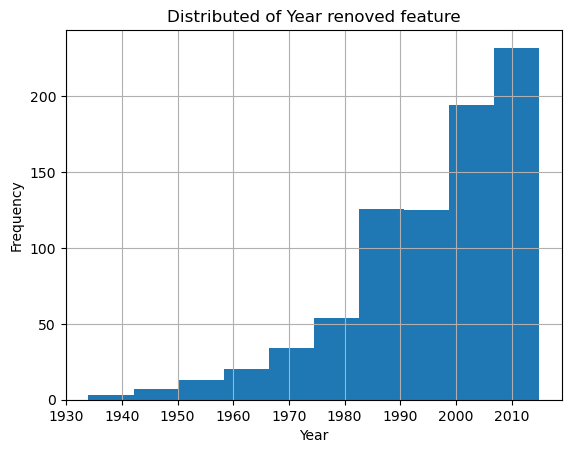

In [35]:
#his filters the DataFrame data2 to include only rows where the yr_renovated value is greater than 1900. This is done to exclude the values of 0, which likely represent houses that were never renovated or where the renovation year is unknown. Then, it selects the yr_renovated column from the filtered DataFrame.
data2[data2['yr_renovated']>1900]['yr_renovated'].hist()#The square brackets [] are used in this context for indexing and selecting specific columns from the DataFrame after applying a condition.
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distributed of Year renoved feature")
plt.show

In [36]:
# Define function to create was_renovated_post90 feature
def renovation_feature(data2):
    '''Creates bool to check and create bool for renoved_post90 and drops original feature'''
    data2['was_renoved_post90']=data2['yr_renovated'].map(lambda x:1 if x>1990 else 0)
    data2=data2.drop('yr_renovated',axis=1)
    return data2

In [37]:
## Apply function on df
data2=renovation_feature(data2)

In [38]:
#to show the changes
data2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90
6181,2787310130,20141212T000000,4,1.75,2090,7416,1.0,0,0,4,...,1050,1040,1970,98031,47.4107,-122.179,1710,7527,289950.0,0
4688,4358700100,20141202T000000,3,2.50,1450,5175,1.0,0,0,3,...,1030,420,1995,98133,47.7082,-122.338,1740,9250,465000.0,0
1703,3121069036,20141208T000000,3,1.75,3020,360241,2.0,0,0,3,...,3020,0,1992,98092,47.2662,-122.088,1890,209959,617000.0,0
21200,1959700225,20150224T000000,3,1.75,1370,1990,3.0,0,0,3,...,1370,0,2014,98102,47.6434,-122.324,1730,1990,720000.0,0
18874,3205500230,20140811T000000,3,1.75,1330,7216,1.0,0,0,3,...,1330,0,1969,98034,47.7199,-122.180,1500,8000,381000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,20141113T000000,3,1.50,1000,6914,1.0,0,0,3,...,1000,0,1947,98125,47.7144,-122.319,1000,6947,378000.0,0
21575,9578500790,20141111T000000,3,2.50,3087,5002,2.0,0,0,3,...,3087,0,2014,98023,47.2974,-122.349,2927,5183,399950.0,0
5390,7202350480,20140930T000000,3,2.50,2120,4780,2.0,0,0,3,...,2120,0,2004,98053,47.6810,-122.032,1690,2650,575000.0,0
860,1723049033,20140620T000000,1,0.75,380,15000,1.0,0,0,3,...,380,0,1963,98168,47.4810,-122.323,1170,15000,245000.0,0


# Let us now consider the year the house was built.

In [39]:
# Get summary statistics for yr_built
data2['yr_built'].describe()

count    19451.000000
mean      1971.063441
std         29.399033
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

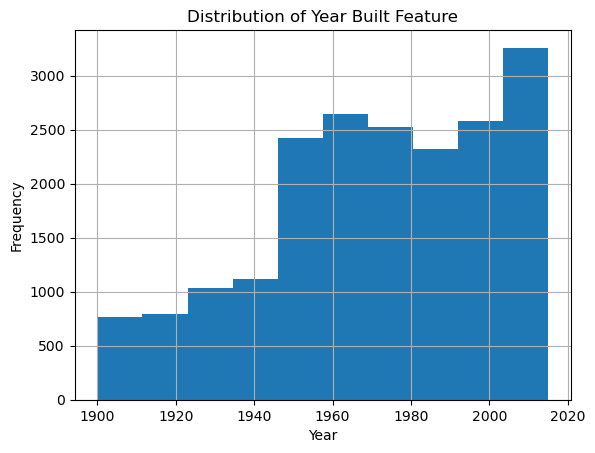

In [40]:
## Visualise yr_built distribution
data2['yr_built'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year Built Feature')
plt.show()

In [41]:
# Define function to map yr_built into bins
def year_built(data2):
    ''' Maps yr_built feature into categorical bins'''
    
    # Define bins based on statistics
    yr_built_bins = [1899, 1950, 1975, 1997, 2016]
    yr_built_labels = ['pre1950', '1950_to_1975', '1975_to_1997', '1997_to_2015']
    
    # Map to bins using pd.cut()
    data2['yr_built'] = pd.cut(data2['yr_built'], bins = yr_built_bins, labels = yr_built_labels)
    
    return data2

In [42]:
# Apply function to data2
data2=year_built(data2)
data2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90
6181,2787310130,20141212T000000,4,1.75,2090,7416,1.0,0,0,4,...,1050,1040,1950_to_1975,98031,47.4107,-122.179,1710,7527,289950.0,0
4688,4358700100,20141202T000000,3,2.50,1450,5175,1.0,0,0,3,...,1030,420,1975_to_1997,98133,47.7082,-122.338,1740,9250,465000.0,0
1703,3121069036,20141208T000000,3,1.75,3020,360241,2.0,0,0,3,...,3020,0,1975_to_1997,98092,47.2662,-122.088,1890,209959,617000.0,0
21200,1959700225,20150224T000000,3,1.75,1370,1990,3.0,0,0,3,...,1370,0,1997_to_2015,98102,47.6434,-122.324,1730,1990,720000.0,0
18874,3205500230,20140811T000000,3,1.75,1330,7216,1.0,0,0,3,...,1330,0,1950_to_1975,98034,47.7199,-122.180,1500,8000,381000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,20141113T000000,3,1.50,1000,6914,1.0,0,0,3,...,1000,0,pre1950,98125,47.7144,-122.319,1000,6947,378000.0,0
21575,9578500790,20141111T000000,3,2.50,3087,5002,2.0,0,0,3,...,3087,0,1997_to_2015,98023,47.2974,-122.349,2927,5183,399950.0,0
5390,7202350480,20140930T000000,3,2.50,2120,4780,2.0,0,0,3,...,2120,0,1997_to_2015,98053,47.6810,-122.032,1690,2650,575000.0,0
860,1723049033,20140620T000000,1,0.75,380,15000,1.0,0,0,3,...,380,0,1950_to_1975,98168,47.4810,-122.323,1170,15000,245000.0,0


As we saw that `sqft_basement` had mostly 0 values, indicating no basement, let us create a new feature `has_basement` which has value `1` if the house has a basement and `0` otherwise. We will then drop the original `sqft_basement` variable.

In [43]:
## Define function has_basement
def has_basement(data2):
    '''creates bool features has basement and drop the original basement feature'''
    data2['has_basement']=data2['sqft_basement'].map(lambda x:1 if x>0 else 0)
    data2=data2.drop('sqft_basement', axis=1)
    return data2

In [44]:
# Apply function to data2
data2=has_basement(data2)
data2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90,has_basement
6181,2787310130,20141212T000000,4,1.75,2090,7416,1.0,0,0,4,...,1050,1950_to_1975,98031,47.4107,-122.179,1710,7527,289950.0,0,1
4688,4358700100,20141202T000000,3,2.50,1450,5175,1.0,0,0,3,...,1030,1975_to_1997,98133,47.7082,-122.338,1740,9250,465000.0,0,1
1703,3121069036,20141208T000000,3,1.75,3020,360241,2.0,0,0,3,...,3020,1975_to_1997,98092,47.2662,-122.088,1890,209959,617000.0,0,0
21200,1959700225,20150224T000000,3,1.75,1370,1990,3.0,0,0,3,...,1370,1997_to_2015,98102,47.6434,-122.324,1730,1990,720000.0,0,0
18874,3205500230,20140811T000000,3,1.75,1330,7216,1.0,0,0,3,...,1330,1950_to_1975,98034,47.7199,-122.180,1500,8000,381000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,20141113T000000,3,1.50,1000,6914,1.0,0,0,3,...,1000,pre1950,98125,47.7144,-122.319,1000,6947,378000.0,0,0
21575,9578500790,20141111T000000,3,2.50,3087,5002,2.0,0,0,3,...,3087,1997_to_2015,98023,47.2974,-122.349,2927,5183,399950.0,0,0
5390,7202350480,20140930T000000,3,2.50,2120,4780,2.0,0,0,3,...,2120,1997_to_2015,98053,47.6810,-122.032,1690,2650,575000.0,0,0
860,1723049033,20140620T000000,1,0.75,380,15000,1.0,0,0,3,...,380,1950_to_1975,98168,47.4810,-122.323,1170,15000,245000.0,0,0


We saw that `view` had mostly 0 values, indicating not been viewed, let us create a new feature `viewed` which has value 1 if the house has been viewed and 0 otherwise. We will drop the original `view` variable.

In [45]:
def viewed(data2):
    '''creates bool feature viewed and drops original view feature'''
    data2['viewed']=data2['view'].map(lambda x:1 if x>0 else 0)
    data2=data2.drop('view',axis=1)
    return data2

In [46]:
#Apply function to data2
data2=viewed(data2)
data2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90,has_basement,viewed
6181,2787310130,20141212T000000,4,1.75,2090,7416,1.0,0,4,7,...,1950_to_1975,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,4358700100,20141202T000000,3,2.50,1450,5175,1.0,0,3,8,...,1975_to_1997,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
1703,3121069036,20141208T000000,3,1.75,3020,360241,2.0,0,3,8,...,1975_to_1997,98092,47.2662,-122.088,1890,209959,617000.0,0,0,0
21200,1959700225,20150224T000000,3,1.75,1370,1990,3.0,0,3,9,...,1997_to_2015,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,3205500230,20140811T000000,3,1.75,1330,7216,1.0,0,3,7,...,1950_to_1975,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0


Let us now investigate the bathrooms feature.

In [47]:
data2['bathrooms'].describe()

count    19451.000000
mean         2.114698
std          0.770724
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [48]:
data2['bathrooms'].unique()

array([1.75, 2.5 , 1.5 , 1.  , 2.  , 2.25, 2.75, 3.5 , 3.75, 3.  , 4.5 ,
       3.25, 5.75, 4.  , 0.75, 4.25, 6.75, 4.75, 5.25, 0.  , 6.5 , 5.5 ,
       8.  , 7.5 , 6.  , 5.  , 6.25, 0.5 , 1.25, 7.75])

In [49]:
#For simplicity we will choose to round this feature to the nearest integer.
def round_bathrooms(data2):
    '''Round bathroom feature and convert to int'''
    data2['bathrooms']=data2['bathrooms'].map(lambda x:int(round(x,0)))
    return data2

In [50]:
#Apply function of data2
data2=round_bathrooms(data2)
data2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90,has_basement,viewed
6181,2787310130,20141212T000000,4,2,2090,7416,1.0,0,4,7,...,1950_to_1975,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,4358700100,20141202T000000,3,2,1450,5175,1.0,0,3,8,...,1975_to_1997,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
1703,3121069036,20141208T000000,3,2,3020,360241,2.0,0,3,8,...,1975_to_1997,98092,47.2662,-122.088,1890,209959,617000.0,0,0,0
21200,1959700225,20150224T000000,3,2,1370,1990,3.0,0,3,9,...,1997_to_2015,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,3205500230,20140811T000000,3,2,1330,7216,1.0,0,3,7,...,1950_to_1975,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0


# Consider outliers

<function matplotlib.pyplot.show(close=None, block=None)>

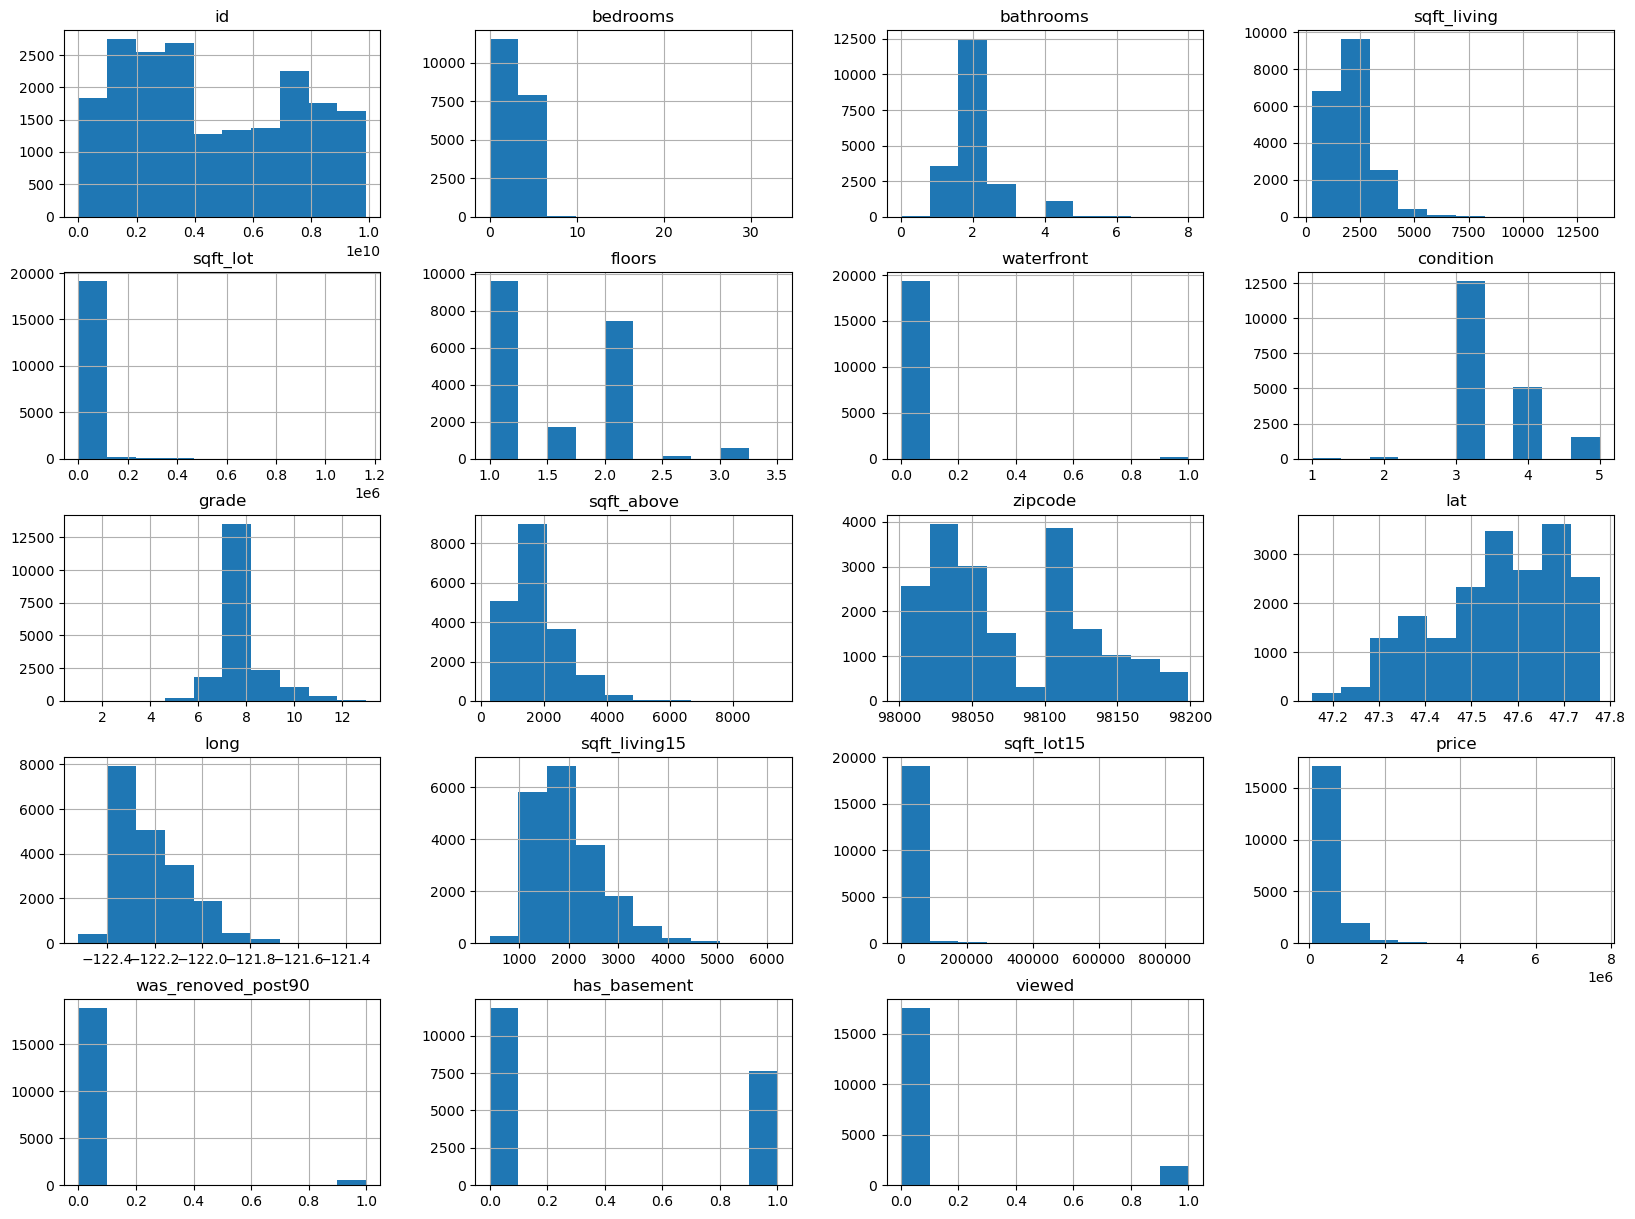

In [51]:
data2.hist(figsize=(20,15))
plt.show

In [52]:
#investigate bedrooms
data2['bedrooms'].value_counts()

3     8844
4     6193
2     2491
5     1441
6      239
1      175
7       34
8       12
0       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

we note that the house with 33 bed rooms is lesser worth

In [53]:
#data2[data2['bedrooms']==33]

In [54]:
#data2.loc[15856,'bedrooms']=3

In [55]:
# Check initial size of df to see how much data we lost
originalsize=len(data2) #data after train and split data
originalsize

19451

In [56]:
from scipy.stats import zscore
import numpy as np
# Define function to remove outliers

def remove_outliers(data2):
    '''Removes entries with z-score above 3 for specific columns (columns that have numeric value only bec z-score cannot calculate string value)'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        data2 = data2[np.abs(data2[variable] - data2[variable].mean()) <= (3 * data2[variable].std())]
        # z-scores for all columns in the DataFrame df, and then removes rows where any z-score in any column is above 3.
        #z= x−μ/σ
    return data2


In [57]:
data2=remove_outliers(data2)
data2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90,has_basement,viewed
6181,2787310130,20141212T000000,4,2,2090,7416,1.0,0,4,7,...,1950_to_1975,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,4358700100,20141202T000000,3,2,1450,5175,1.0,0,3,8,...,1975_to_1997,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
21200,1959700225,20150224T000000,3,2,1370,1990,3.0,0,3,9,...,1997_to_2015,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,3205500230,20140811T000000,3,2,1330,7216,1.0,0,3,7,...,1950_to_1975,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0
19388,7974200937,20140513T000000,3,2,1270,5112,1.0,0,3,7,...,pre1950,98115,47.6760,-122.288,1580,5080,465000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,20141113T000000,3,2,1000,6914,1.0,0,3,7,...,pre1950,98125,47.7144,-122.319,1000,6947,378000.0,0,0,0
21575,9578500790,20141111T000000,3,2,3087,5002,2.0,0,3,8,...,1997_to_2015,98023,47.2974,-122.349,2927,5183,399950.0,0,0,0
5390,7202350480,20140930T000000,3,2,2120,4780,2.0,0,3,7,...,1997_to_2015,98053,47.6810,-122.032,1690,2650,575000.0,0,0,0
860,1723049033,20140620T000000,1,1,380,15000,1.0,0,3,5,...,1950_to_1975,98168,47.4810,-122.323,1170,15000,245000.0,0,0,0


In [58]:
# See size of df now
newsize = len(data2)#19451
newsize

18050

In [59]:
#Get % of data removed
round((originalsize-newsize)/originalsize*100,2)

7.2

By performing this step we lost approximately 7.2% of our data.

# Investigate price


In [60]:
data2['price'].describe().round(3)

count      18050.000
mean      504830.936
std       280377.211
min        75000.000
25%       315462.500
50%       440000.000
75%       618000.000
max      3300000.000
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

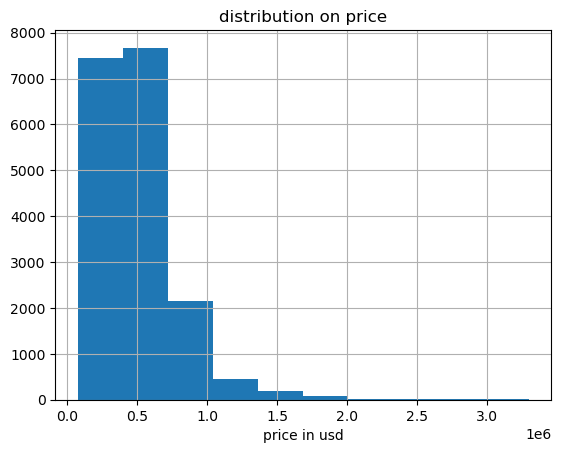

In [61]:
# View price distribution
data2['price'].hist()
plt.xlabel('price in usd')
plt.title('distribution on price')
plt.show

In [62]:
#look at 0.9 percentile
for i in range(90 ,100):
    q=i/100
    quantile =data2['price'].quantile(q=q)
    print(f'{q} percentile:{round(quantile ,3)}')

0.9 percentile:825000.0
0.91 percentile:850000.0
0.92 percentile:875000.0
0.93 percentile:903000.0
0.94 percentile:939060.0
0.95 percentile:987550.0
0.96 percentile:1065020.0
0.97 percentile:1197530.0
0.98 percentile:1325020.0
0.99 percentile:1577550.0


In [63]:
#Let us remove houses with price above $1.6m. These can be studied separately as part of a wider project
data2 =data2[data2['price']<1600000]
data2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renoved_post90,has_basement,viewed
6181,2787310130,20141212T000000,4,2,2090,7416,1.0,0,4,7,...,1950_to_1975,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,4358700100,20141202T000000,3,2,1450,5175,1.0,0,3,8,...,1975_to_1997,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
21200,1959700225,20150224T000000,3,2,1370,1990,3.0,0,3,9,...,1997_to_2015,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,3205500230,20140811T000000,3,2,1330,7216,1.0,0,3,7,...,1950_to_1975,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0
19388,7974200937,20140513T000000,3,2,1270,5112,1.0,0,3,7,...,pre1950,98115,47.6760,-122.288,1580,5080,465000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,20141113T000000,3,2,1000,6914,1.0,0,3,7,...,pre1950,98125,47.7144,-122.319,1000,6947,378000.0,0,0,0
21575,9578500790,20141111T000000,3,2,3087,5002,2.0,0,3,8,...,1997_to_2015,98023,47.2974,-122.349,2927,5183,399950.0,0,0,0
5390,7202350480,20140930T000000,3,2,2120,4780,2.0,0,3,7,...,1997_to_2015,98053,47.6810,-122.032,1690,2650,575000.0,0,0,0
860,1723049033,20140620T000000,1,1,380,15000,1.0,0,3,5,...,1950_to_1975,98168,47.4810,-122.323,1170,15000,245000.0,0,0,0


# Preparing data for modelling

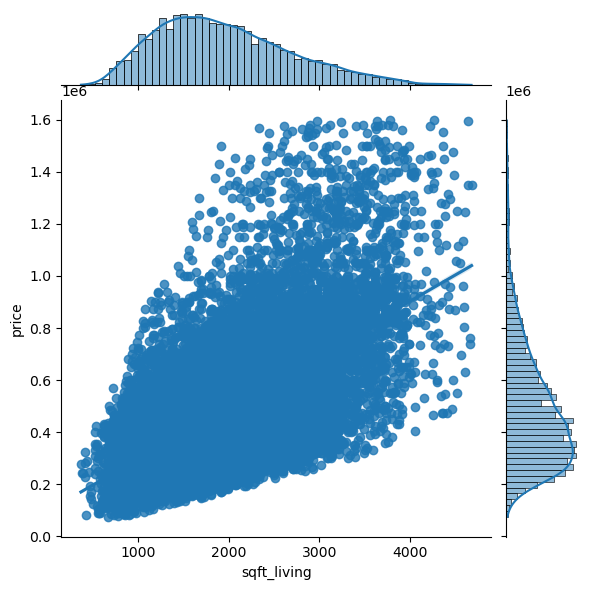

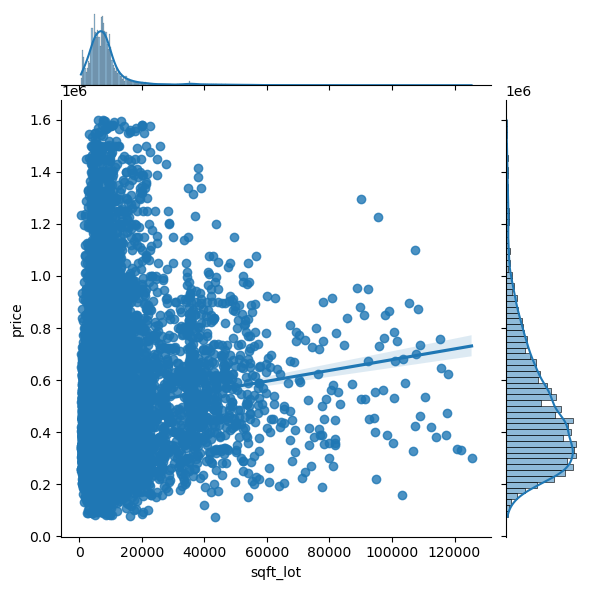

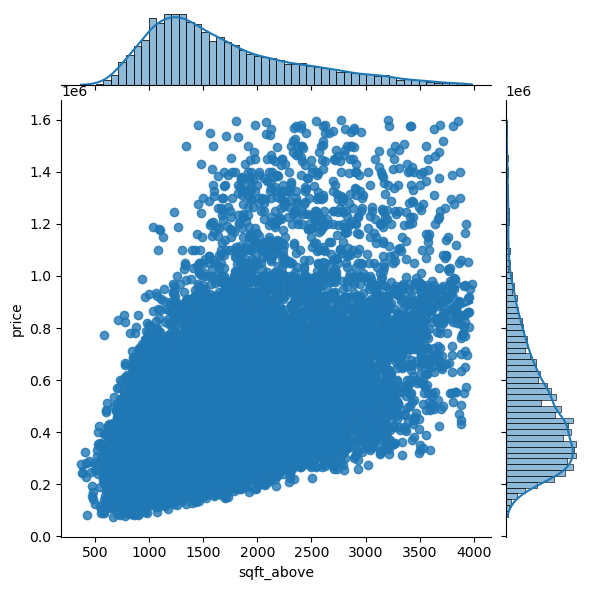

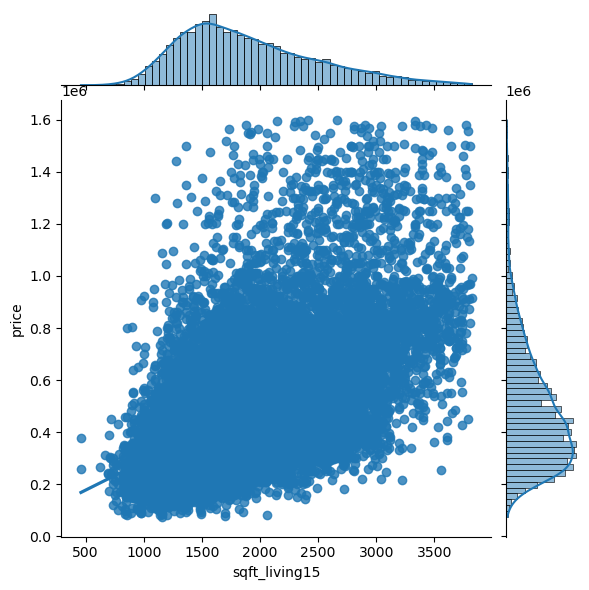

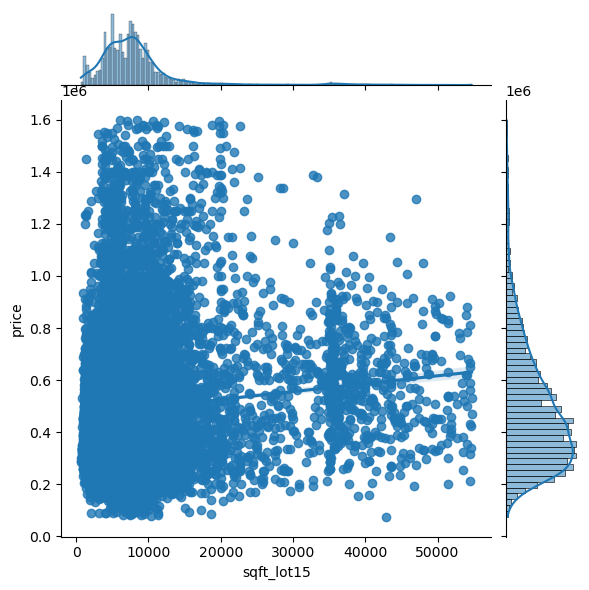

In [64]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = data2[feature], y = data2['price'], kind = 'reg')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2496\2377819401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data2.corr()


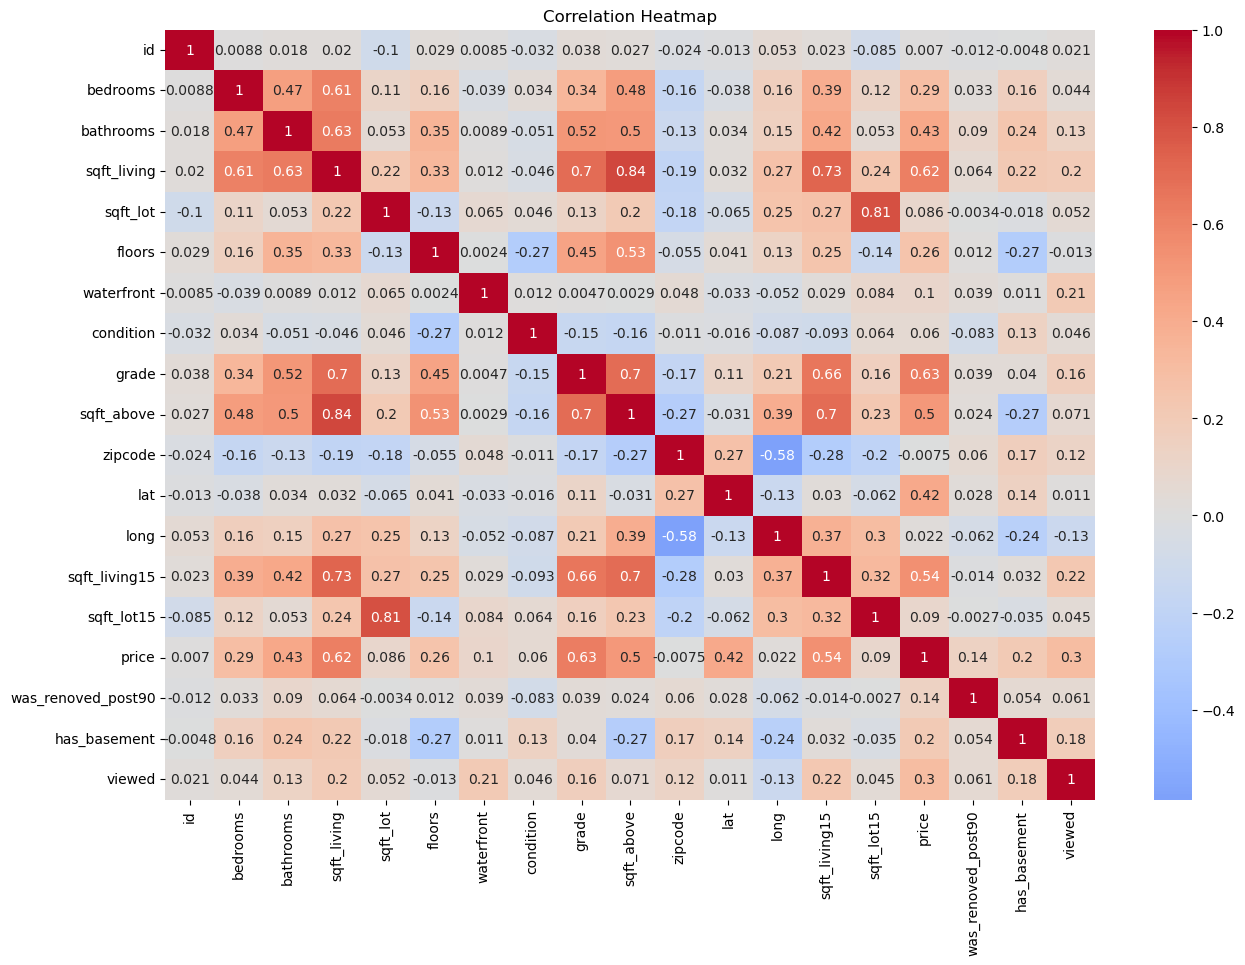

In [65]:
# Correlation matrix
corr = data2.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
def drop_corrfeats(data2):
    '''Drop features which appear correlated'''
    data2 = data2.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return data2

In [67]:
# Drop multicollinear features
data2 = drop_corrfeats(data2)

In [68]:
# View head
data2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,price,was_renoved_post90,has_basement,viewed
6181,2787310130,20141212T000000,4,2,2090,7416,1.0,0,4,7,1950_to_1975,98031,47.4107,-122.179,289950.0,0,1,0
4688,4358700100,20141202T000000,3,2,1450,5175,1.0,0,3,8,1975_to_1997,98133,47.7082,-122.338,465000.0,0,1,0
21200,1959700225,20150224T000000,3,2,1370,1990,3.0,0,3,9,1997_to_2015,98102,47.6434,-122.324,720000.0,0,0,0
18874,3205500230,20140811T000000,3,2,1330,7216,1.0,0,3,7,1950_to_1975,98034,47.7199,-122.180,381000.0,0,0,0
19388,7974200937,20140513T000000,3,2,1270,5112,1.0,0,3,7,pre1950,98115,47.6760,-122.288,465000.0,0,0,0


# One-hot encoding

In [69]:
# Define one-hot encoding function
def one_hot_encode(data2, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = data2[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    data2 = pd.concat([data2,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    data2 = data2.drop(catcols, axis = 1)
        
    return data2

In [70]:
# Apply function on df
data2 = one_hot_encode(data2, 'yr_built')
data2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,price,was_renoved_post90,has_basement,viewed,1950_to_1975,1975_to_1997,1997_to_2015
6181,2787310130,20141212T000000,4,2,2090,7416,1.0,0,4,7,98031,47.4107,-122.179,289950.0,0,1,0,1,0,0
4688,4358700100,20141202T000000,3,2,1450,5175,1.0,0,3,8,98133,47.7082,-122.338,465000.0,0,1,0,0,1,0
21200,1959700225,20150224T000000,3,2,1370,1990,3.0,0,3,9,98102,47.6434,-122.324,720000.0,0,0,0,0,0,1
18874,3205500230,20140811T000000,3,2,1330,7216,1.0,0,3,7,98034,47.7199,-122.180,381000.0,0,0,0,1,0,0
19388,7974200937,20140513T000000,3,2,1270,5112,1.0,0,3,7,98115,47.6760,-122.288,465000.0,0,0,0,0,0,0


In [71]:
# Define function to remove unecessary columns
def removecols(data2):
    data2 = data2.drop(['id', 'date'], axis = 1)
    return data2

In [72]:
# Apply to df
data2 = removecols(data2)

In [73]:
copiedData = data2.copy()# i taked copy to work on it instead of original data

In [74]:
copiedData.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,price,was_renoved_post90,has_basement,viewed,1950_to_1975,1975_to_1997,1997_to_2015
6181,4,2,2090,7416,1.0,0,4,7,98031,47.4107,-122.179,289950.0,0,1,0,1,0,0
4688,3,2,1450,5175,1.0,0,3,8,98133,47.7082,-122.338,465000.0,0,1,0,0,1,0
21200,3,2,1370,1990,3.0,0,3,9,98102,47.6434,-122.324,720000.0,0,0,0,0,0,1
18874,3,2,1330,7216,1.0,0,3,7,98034,47.7199,-122.180,381000.0,0,0,0,1,0,0
19388,3,2,1270,5112,1.0,0,3,7,98115,47.6760,-122.288,465000.0,0,0,0,0,0,0


# Simple linear regression

OLS stands for Ordinary Least Squares.
It is a method used in regression analysis to estimate the parameters of a linear regression model.
The goal of OLS is to find the line (or hyperplane, in higher dimensions) that best fits the observed data points by minimizing the sum of the squared differences between the observed 
and predicted values.

In [75]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
x_train=np.array(copiedData['sqft_living']).reshape(-1,1)#reshape() function allows you to change the shape of an array without changing its data. In this case, -1 is a placeholder that tells NumPy to infer the number of rows based on the length of the original array, and 1 specifies that we want a single column.
y_train=copiedData['price']

regression line. The sm.add_constant() function is from the statsmodels library (sm), and it adds a column of ones to the beginning of the predictor variable array.

model = sm.OLS(y_train, X_int).fit(): This line creates an Ordinary Least Squares (OLS) regression model using the predictor variables (X_int, which includes the constant term) and the target variable (y_train). The sm.OLS() function initializes the OLS model, and .fit() fits the model to the data, estimating the coefficients of the regression equation.

In [76]:
# Create model in OLS
X_int=sm.add_constant(x_train)
model=sm.OLS(y_train,X_int).fit()
summary=model.summary()
summary#summary = model.summary(): This line generates a summary of the regression results. The summary() method produces a comprehensive summary table that includes various statistics and information about the regression model, such as the coefficients, standard errors, t-values, p-values, R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.113e+04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:44:46   Log-Likelihood:            -2.4268e+05
No. Observations:               17880   AIC:                         4.854e+05
Df Residuals:                   17878   BIC:                         4.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.56e+04   4010.057     23.841      0.000    8.77e+04    1.03e+05
x1           201.7896      1.913    105.479      0.000     198.040     205.539
==============================================================================
Omnibus:                     3011.468   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6356.002
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       5.124   Cond. No.                     5.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(x_train, y_train)

# Evaluate using rmse
#Evaluate using RMSE (Root Mean Squared Error): It calculates the RMSE scores for the model using cross-validation. The cross_val_score() function from scikit-learn is used to perform 10-fold cross-validation. The scoring metric used is the negative mean squared error (neg_mean_squared_error). .
scores = cross_val_score(
    #scikit-learn's cross_val_score() function provides negative MSE values, np.sqrt(-scores) is used to calculate the RMSE scores. Then, the mean and standard deviation of the RMSE scores are calculated and displayed
            linreg, 
            x_train,
            y_train,
            cv=10,# cv=10 means that the dataset is split into 10 equal parts (folds). The model is trained on 9 of these folds and tested on the remaining fold, and this process is repeated 10 times (once for each fold), with each fold used exactly once as the test set.

#This technique, known as 10-fold cross-validation, is a common approach for estimating the performance of machine learning models. It provides a more reliable estimate of model
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([182517.10004394, 197846.78427192, 185442.6722813 , 189415.1383103 ,
       184577.83448141, 187799.30715236, 183221.72421345, 193989.05318545,
       194205.75811771, 198320.47074535])

189733.58428031846

5665.566799375135

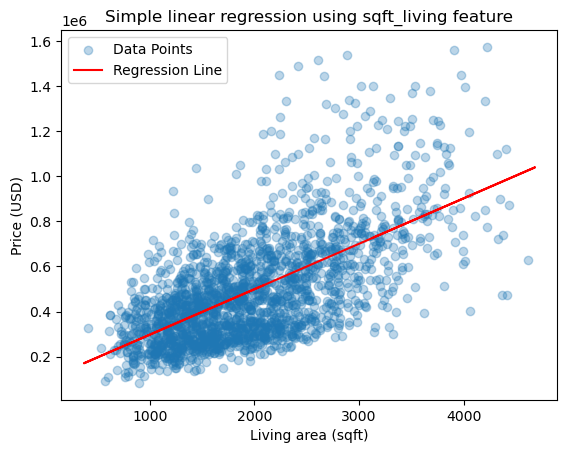

In [78]:
# Create visualisation of simple linear regression

# Get predictions
y_pred = linreg.predict(x_train)
# Plot data points
plt.scatter(x = x_train[:2000], y = y_train[:2000], alpha = 0.3, label = 'Data Points')
# Plot regression line
plt.plot(x_train, y_pred, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using sqft_living feature')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [79]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
evaluationtable = pd.DataFrame({'Model': [], 'Description':[], ' Num Features' : [], 'R-squared':[],
                                'Adj R-squared':[], 'RMSE': [],'RMSE sd':[]})

# Add data for simple linear regression
evaluationtable.loc[0] = ['Simple Linear Regression', 'Sqft_living', model.df_model, round(model.rsquared,3)
                          ,round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std()) ]

# View our evaluation table
evaluationtable

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
0,Simple Linear Regression,Sqft_living,1.0,0.384,0.384,189733,5665
